In [1]:
import numpy as np
import matplotlib.pyplot as plt

Federated Learning


Round 1:
Client1: No bias detected. Fairness score: 0.9831000602238726
Client2: No bias detected. Fairness score: 1.2698451802226833
Client3: No bias detected. Fairness score: 0.8960122838403177
Client4: No bias detected. Fairness score: 1.5805343507701257
Client5: No bias detected. Fairness score: 0.9975689643845305
Round 2:
Client1: No bias detected. Fairness score: 1.092014454466318
Client2: No bias detected. Fairness score: 0.9822930986244062
Client3: No bias detected. Fairness score: 1.0870262914065514
Client4: No bias detected. Fairness score: 0.9426170442342322
Client5: No bias detected. Fairness score: 0.9472221562689396
Round 3:
Client1: No bias detected. Fairness score: 0.8979253079937533
Client2: No bias detected. Fairness score: 0.8407496585494239
Client3: No bias detected. Fairness score: 1.0828168494595325
Client4: No bias detected. Fairness score: 1.172394456085586
Client5: No bias detected. Fairness score: 0.8731239596371473
Round 4:
Client1: No bias detected. Fairness 

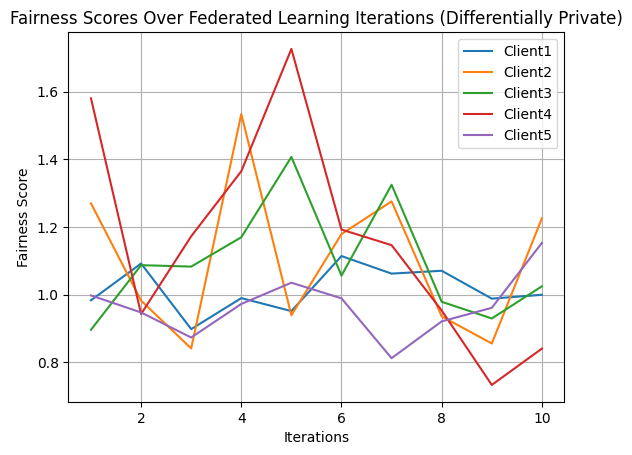

In [2]:
# Simulated federated learning clients
clients = ["Client1", "Client2", "Client3", "Client4", "Client5"]

client_fairness_scores = {client: [] for client in clients}

# Simulated fairness metric
def fairness_metric(predictions, protected_group):
    # Compute fairness metric
    group_positive = sum(predictions[protected_group])
    group_negative = len(predictions[protected_group]) - group_positive
    total_positive = sum(predictions)
    total_negative = len(predictions) - total_positive
    return (group_positive / total_positive) / (group_negative / total_negative)

# Simulated federated learning rounds
num_rounds = 10
epsilon = 0.1  # Privacy parameter for differential privacy

for round in range(num_rounds):
    print(f"Round {round + 1}:")

    # Lists to store fairness scores for this round
    round_fairness_scores = []

    # Simulate model training on clients
    for client in clients:
        # Generate private model updates with differential privacy
        private_predictions = np.random.laplace(scale=1.0 / epsilon, size=100)
        # Clip predictions to [0, 1] to ensure valid probabilities
        private_predictions = np.clip(private_predictions, 0, 1)

        # Simulated protected group
        protected_group = np.random.choice([True, False], size=100)

        # Calculate fairness metric for this client's predictions
        fairness_score = fairness_metric(private_predictions, protected_group)

        # Store the fairness score for this client in this round
        round_fairness_scores.append(fairness_score)

        # Checking for bias
        if fairness_score < 0.8:
            print(f"{client}: Bias detected! Fairness score: {fairness_score}")
        else:
            print(f"{client}: No bias detected. Fairness score: {fairness_score}")

    # Aggregate model updates
    for i, client in enumerate(clients):
        client_fairness_scores[client].append(round_fairness_scores[i])

# Fairness scores over rounds for each client
for client in clients:
    plt.plot(range(1, num_rounds + 1), client_fairness_scores[client], label=client)

plt.xlabel("Iterations")
plt.ylabel("Fairness Score")
plt.title("Fairness Scores Over Federated Learning Iterations (Differentially Private)")
plt.legend()
plt.grid(True)
plt.show()
